**Lets Grow More**

**Name:** Priyanka Gayake

**Task 4:** Exploratory Data Analysis - Terrorism

As a security/defence analyst, try to find out the hot zone of terrorism.


**Dataset :** https://bit.ly/2TK5Xn5

Importing all the libraries required for analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing and observing the data**

In [ ]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ï»¿eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14292 entries, 0 to 14291
Columns: 135 entries, ï»¿eventid to related
dtypes: float64(61), int64(20), object(54)
memory usage: 14.7+ MB


In [ ]:
df.shape

(14292, 135)

In [ ]:
df.columns

Index(['ï»¿eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
    print(i,end=", ")

ï»¿eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubty

**Cleaning the data**

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14292 entries, 0 to 14291
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            14292 non-null  int64  
 1   Month           14292 non-null  int64  
 2   Day             14292 non-null  int64  
 3   Country         14292 non-null  object 
 4   Region          14292 non-null  object 
 5   Province/State  14229 non-null  object 
 6   City            14292 non-null  object 
 7   Latitude        13806 non-null  float64
 8   Longitude       13806 non-null  float64
 9   Location        586 non-null    object 
 10  Summary         913 non-null    object 
 11  Attack Type     14292 non-null  object 
 12  Target Type     14292 non-null  object 
 13  Group Name      14292 non-null  object 
 14  Motive          647 non-null    object 
 15  Weapon Type     14292 non-null  object 
 16  Killed          12204 non-null  float64
 17  Wounded         10821 non-null 

In [ ]:
df.shape

(14292, 19)

In [ ]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State       63
City                  0
Latitude            486
Longitude           486
Location          13706
Summary           13379
Attack Type           0
Target Type           0
Group Name            0
Motive            13645
Weapon Type           0
Killed             2088
Wounded            3471
Add Notes         13623
dtype: int64

In [ ]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,14292.000000,14292.000000,14292.000000,13806.000000,13806.000000,14292.000000,14292.000000,14292.000000
mean,1977.380912,6.186608,15.195494,29.365147,-25.840023,1.025469,0.950112,1.975581
std,3.144574,3.358288,8.997375,22.233204,55.541730,6.024213,6.653344,9.643184
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000,13.738762,-80.214195,0.000000,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,37.811691,-5.956210,0.000000,0.000000,0.000000
75%,1980.000000,9.000000,23.000000,43.768732,11.256901,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


**Observation**


The data consists of terrorist activities ranging from the year: 1970 to 2017

Maximum number of people killed in an event were: 1570

Maximum number of people wounded in an event were: 8191

Maximum number of total casualties in an event were: 9574

**Visualizing the data**

**1. Year wise Attacks**

1. Number of Attacks in each Year

In [ ]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


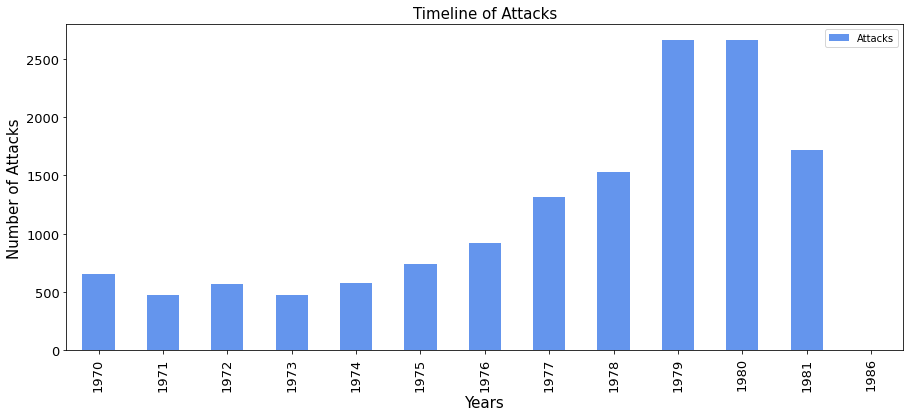

In [ ]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

1. Total Casualties (Killed + Wounded) in each Year

In [ ]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


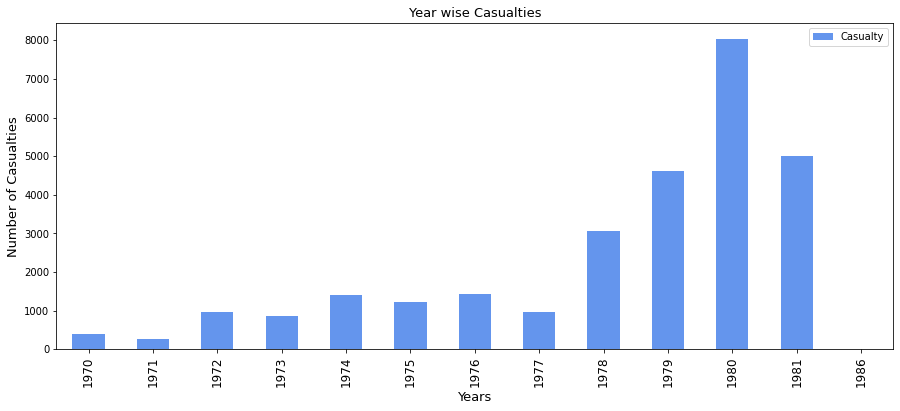

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Killed in each Year

In [ ]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


1. Wounded in each Region

In [ ]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


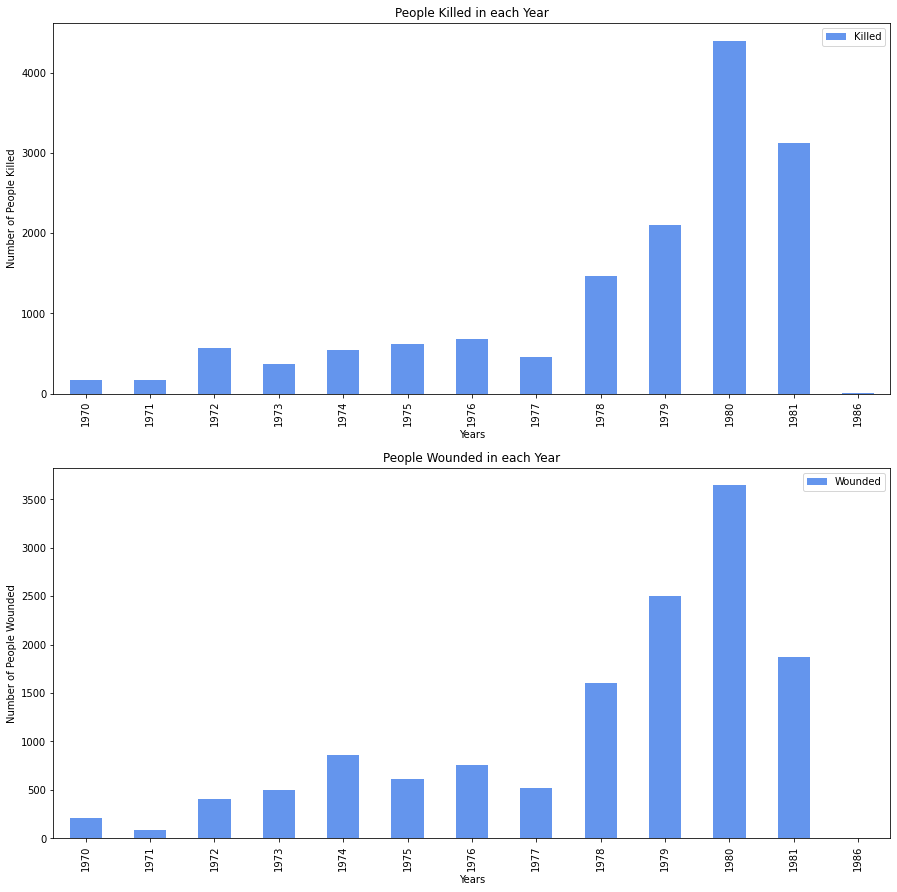

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**2. Region wise Attacks**

1. Distribution of Terrorist Attacks over Regions from 1970-2017

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


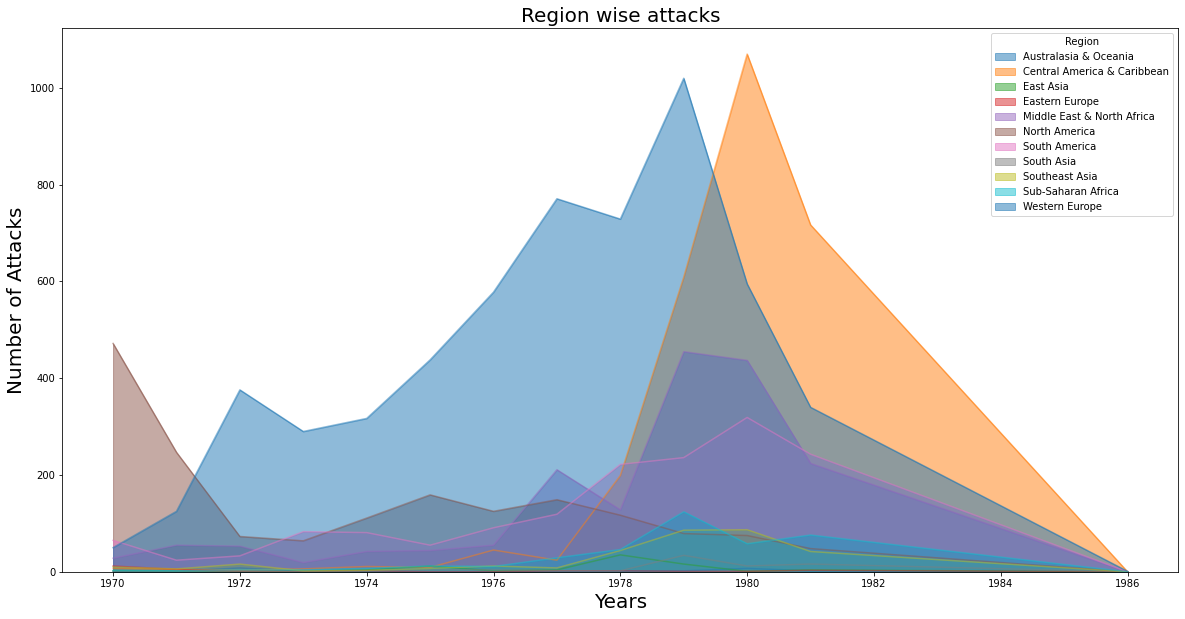

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

1. Total Terrorist Attacks in each Region from 1970-2017

In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 5630
Central America & Caribbean    2705
Middle East & North Africa     1751
North America                  1719
South America                  1571
Sub-Saharan Africa              376
Southeast Asia                  323
East Asia                        83
South Asia                       79
Eastern Europe                   30
Australasia & Oceania            25
Name: Total, dtype: int64

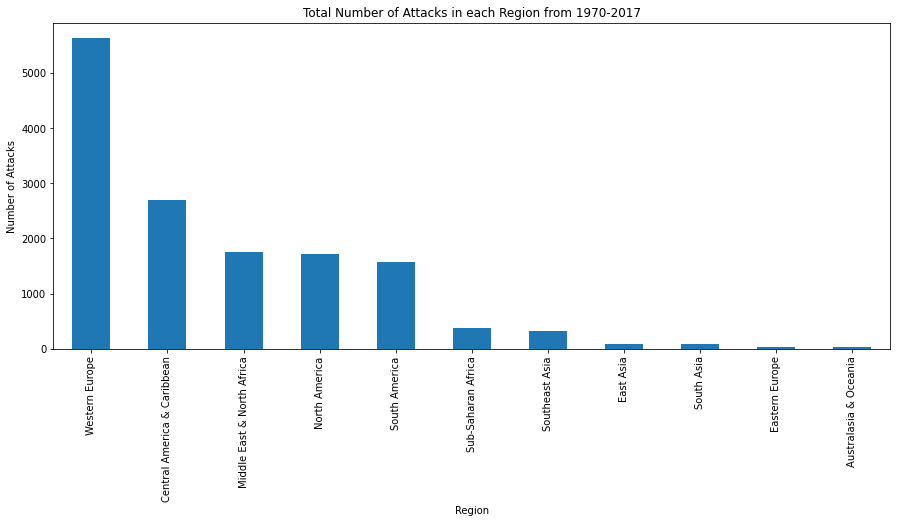

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

1. Total Casualties (Killed + Wounded) in each Region

In [ ]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Central America & Caribbean,7285.0
Western Europe,7270.0
Middle East & North Africa,6040.0
Southeast Asia,2998.0
South America,1615.0
Sub-Saharan Africa,1426.0
North America,998.0
South Asia,392.0
East Asia,129.0


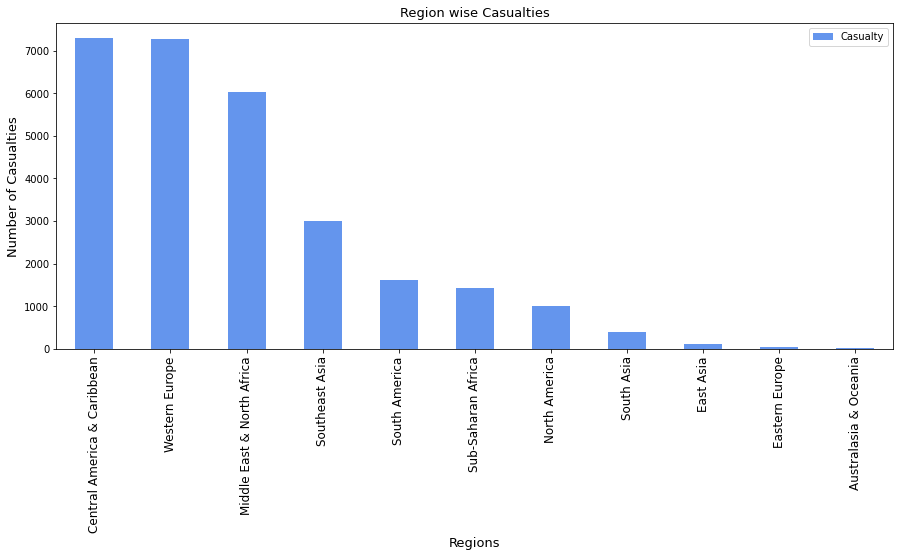

In [ ]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Killed in each Region

In [ ]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Central America & Caribbean,5979.0
Western Europe,3158.0
Middle East & North Africa,2056.0
Southeast Asia,1134.0
South America,1112.0
Sub-Saharan Africa,674.0
North America,293.0
South Asia,175.0
East Asia,37.0


1. Wounded in each Region

In [ ]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Western Europe,4112.0
Middle East & North Africa,3984.0
Southeast Asia,1864.0
Central America & Caribbean,1306.0
Sub-Saharan Africa,752.0
North America,705.0
South America,503.0
South Asia,217.0
East Asia,92.0


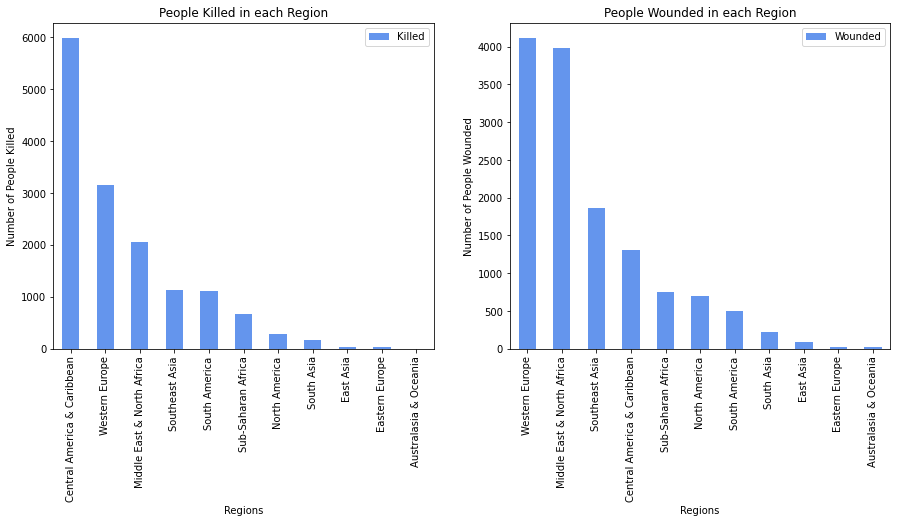

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**3. Country wise Attacks - Top 10**

1. Number of Attacks in each Country

In [ ]:
ct=df["Country"].value_counts().head(10)
ct

United Kingdom    1862
El Salvador       1590
United States     1588
Italy             1181
Spain             1175
Colombia           659
Guatemala          638
France             612
Turkey             585
Nicaragua          345
Name: Country, dtype: int64

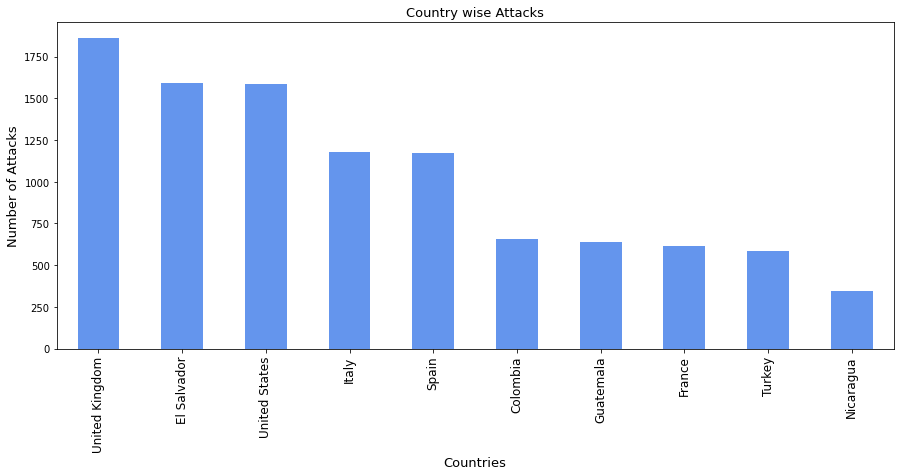

In [ ]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1. Total Casualties (Killed + Wounded) in each Country

In [ ]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
El Salvador,4655.0
United Kingdom,3300.0
Philippines,1955.0
Guatemala,1816.0
Iran,1645.0
Israel,1387.0
Spain,1314.0
Italy,1095.0
Lebanon,978.0


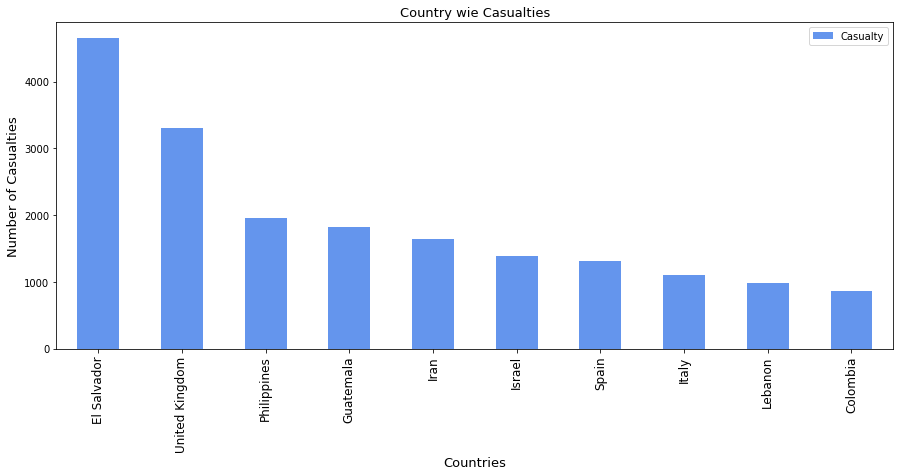

In [ ]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Killed in each Country

In [ ]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
El Salvador,3957.0
United Kingdom,1896.0
Guatemala,1472.0
Iran,755.0
Colombia,691.0
Philippines,664.0
Spain,467.0
Nicaragua,422.0
Argentina,328.0


1. Wounded in each Country

In [ ]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
United Kingdom,1404.0
Philippines,1291.0
Israel,1118.0
Iran,890.0
Spain,847.0
Italy,777.0
El Salvador,698.0
Lebanon,685.0
United States,655.0


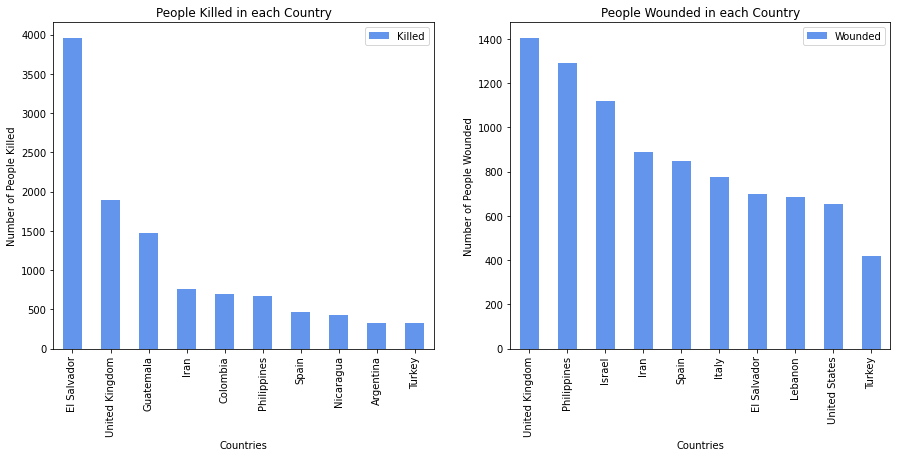

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**4. City wise Attacks - Top 10**

1. Number of Attacks in each city

In [ ]:
city=df["City"].value_counts()[1:11]
city

San Salvador      738
Unknown           648
Rome              429
New York City     347
Paris             323
Guatemala City    270
Madrid            221
Buenos Aires      209
Istanbul          186
Beirut            184
Name: City, dtype: int64

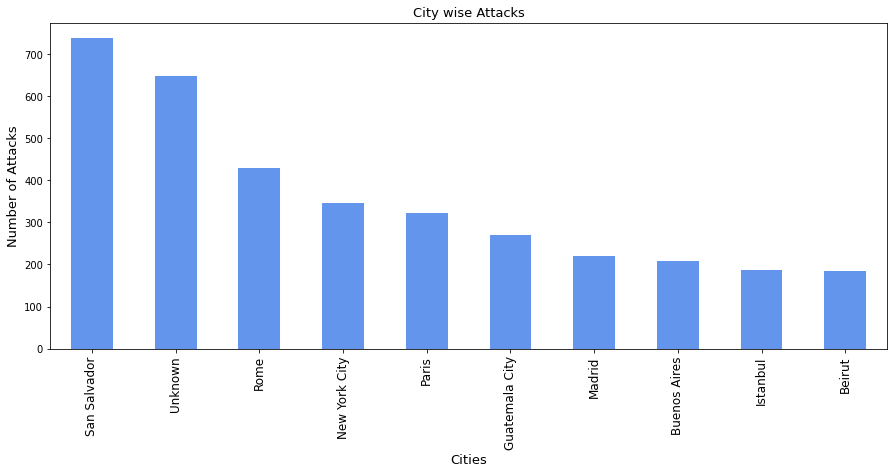

In [ ]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1. Total Casualties (Killed + Wounded) in each City

In [ ]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Belfast,1260.0
San Salvador,785.0
Beirut,722.0
Guatemala City,571.0
London,558.0
Jerusalem,525.0
Tehran,503.0
Abadan,492.0
Madrid,438.0


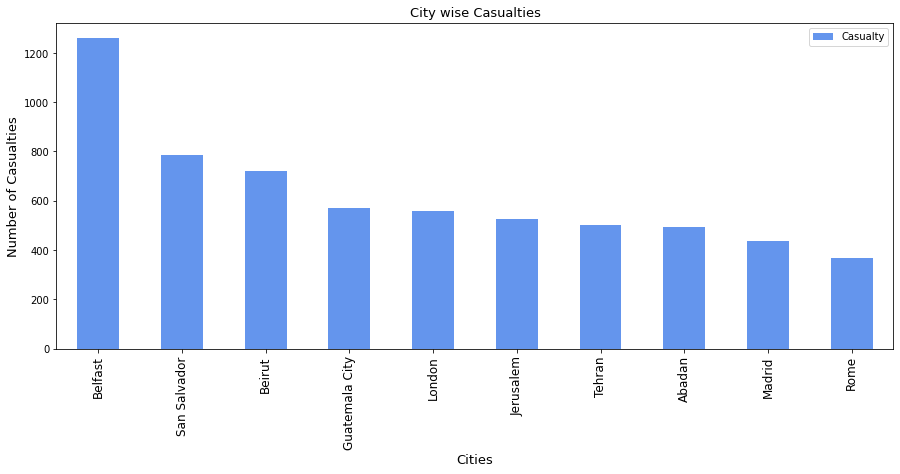

In [ ]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Killed in each City

In [ ]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Belfast,938.0
San Salvador,581.0
Abadan,429.0
Guatemala City,378.0
Suchitoto,317.0
Beirut,230.0
Buenos Aires,226.0
Aleppo,193.0
Tehran,181.0


1. Wounded in each City

In [ ]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
London,517.0
Beirut,492.0
Jerusalem,484.0
Madrid,337.0
Tehran,322.0
Belfast,322.0
Baghdad,294.0
New York City,271.0
Istanbul,247.0


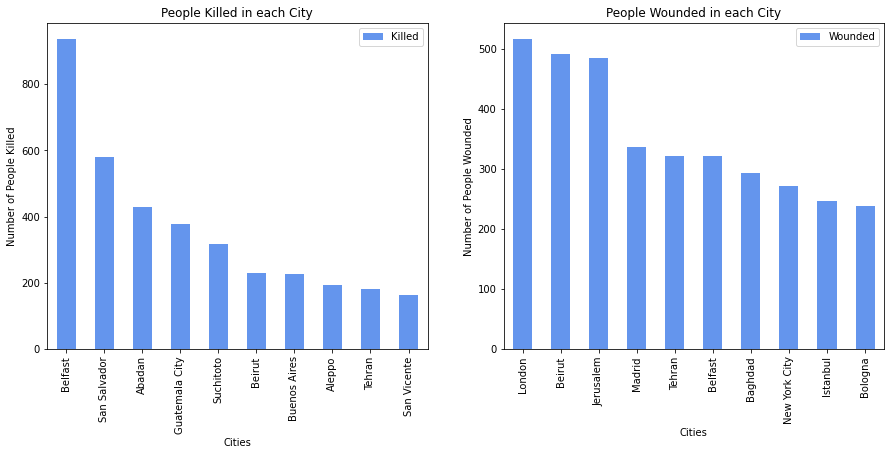

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**5. Terrorist Group wise Attacks - Top 10**

1. Number of Attacks by each Group

In [ ]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                         1184
Basque Fatherland and Freedom (ETA)                  612
Farabundo Marti National Liberation Front (FMLN)     272
Palestinians                                         266
Protestant extremists                                206
Red Brigades                                         200
Sandinista National Liberation Front (FSLN)          197
Revolutionary Armed Forces of Colombia (FARC)        175
Ulster Volunteer Force (UVF)                         175
Name: Group Name, dtype: int64

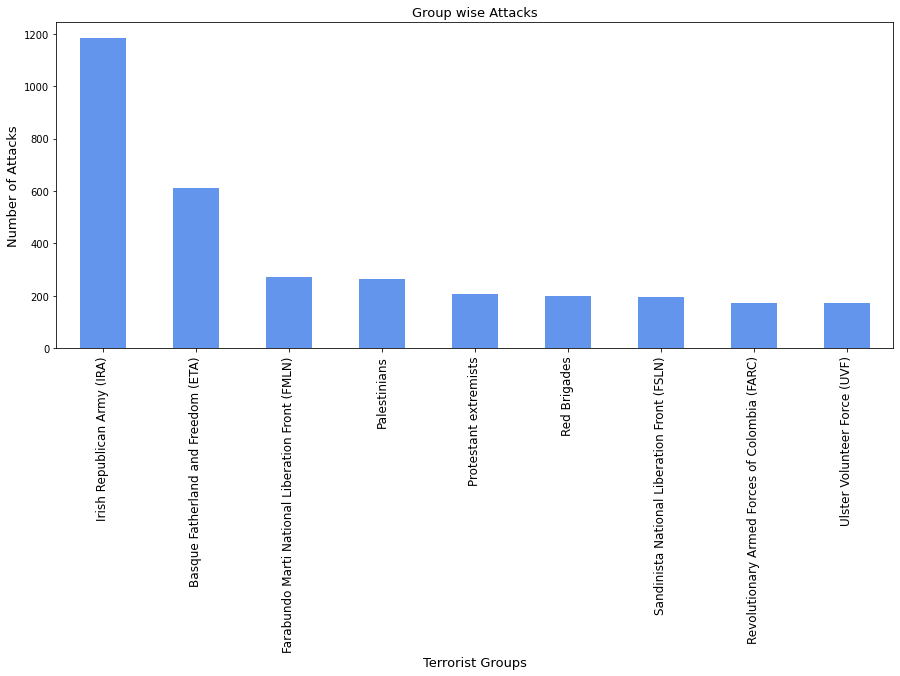

In [ ]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1. Total Casualties(Killed + Wounded) by each Group

In [ ]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Irish Republican Army (IRA),2411.0
Farabundo Marti National Liberation Front (FMLN),1258.0
Basque Fatherland and Freedom (ETA),907.0
Moro National Liberation Front (MNLF),787.0
Palestinians,747.0
Mujahedin-e Khalq (MEK),479.0
Popular Front for the Liberation of Palestine (PFLP),457.0
Revolutionary Armed Forces of Colombia (FARC),424.0
Sandinista National Liberation Front (FSLN),366.0


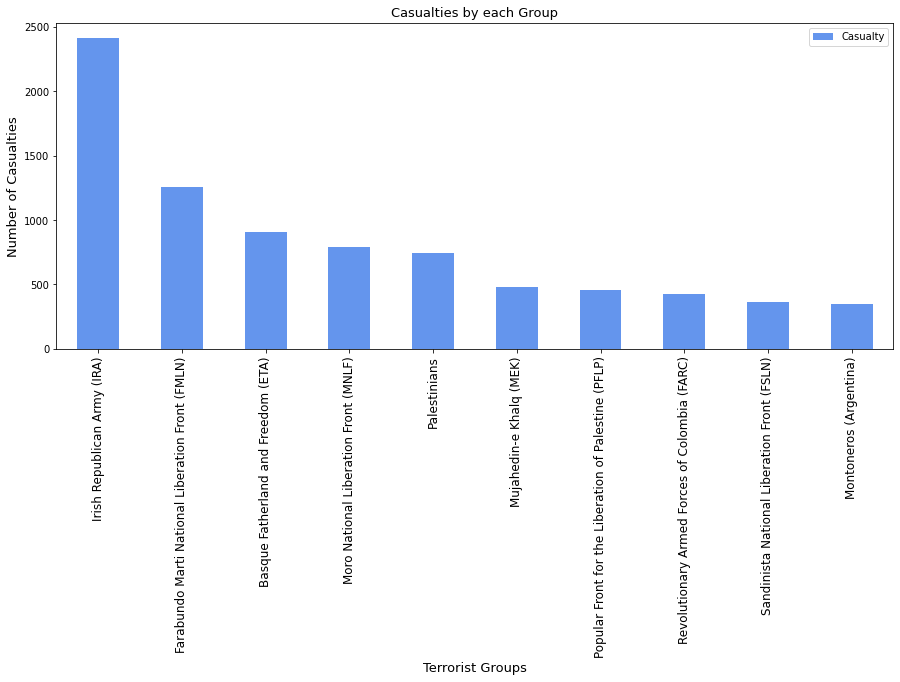

In [ ]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Killed by each Group

In [ ]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Irish Republican Army (IRA),1111.0
Farabundo Marti National Liberation Front (FMLN),1016.0
Mujahedin-e Khalq (MEK),459.0
Revolutionary Armed Forces of Colombia (FARC),353.0
Basque Fatherland and Freedom (ETA),320.0
Moro National Liberation Front (MNLF),312.0
Ulster Volunteer Force (UVF),286.0
Guerrilla Army of the Poor (EGP),281.0
Sandinista National Liberation Front (FSLN),241.0


1. Wounded by each Group

In [ ]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1300.0
Palestinians,643.0
Basque Fatherland and Freedom (ETA),587.0
Moro National Liberation Front (MNLF),475.0
Popular Front for the Liberation of Palestine (PFLP),374.0
Farabundo Marti National Liberation Front (FMLN),242.0
Armed Revolutionary Nuclei (NAR),242.0
Neo-Nazi extremists,227.0
New People's Army (NPA),202.0


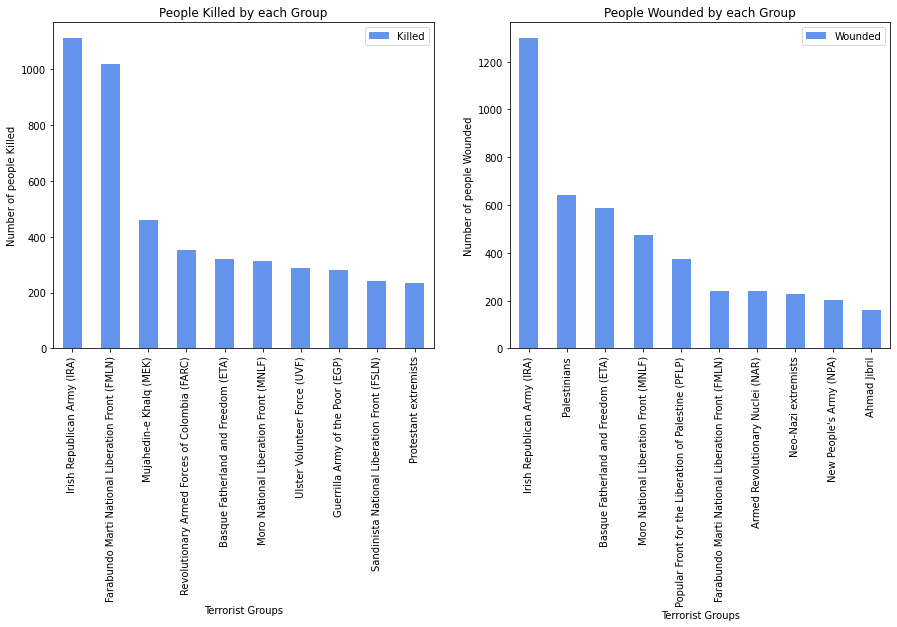

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

**6. Attack Type wise Attacks**

1. Number of Attacks by each Attack Type

In [ ]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      6040
Assassination                          2907
Armed Assault                          2438
Facility/Infrastructure Attack         1375
Hostage Taking (Kidnapping)             749
Unknown                                 430
Hostage Taking (Barricade Incident)     243
Hijacking                                82
Unarmed Assault                          28
Name: Attack Type, dtype: int64

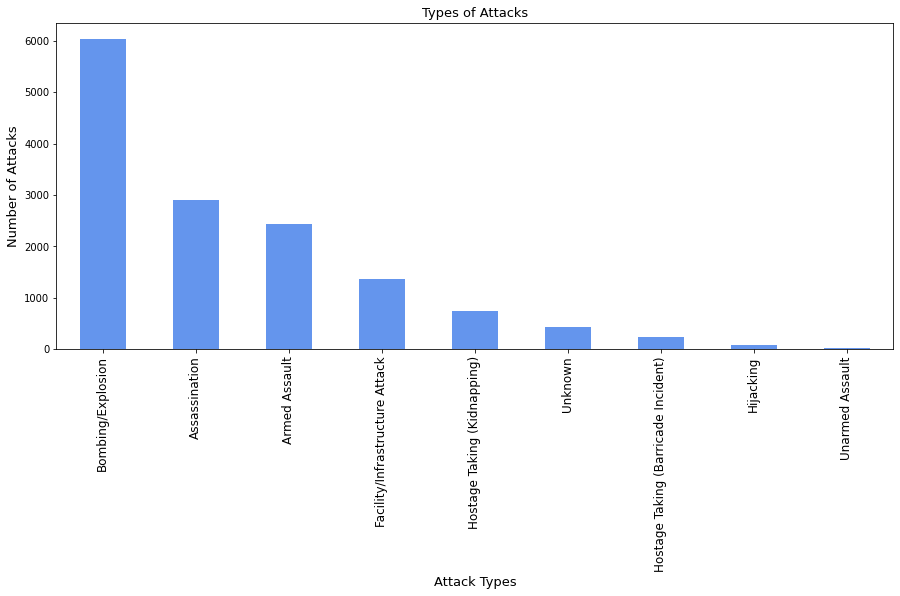

In [ ]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1. Total Casualties (Killed + Wounded) by each Attack Type

In [ ]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Bombing/Explosion,13375.0
Armed Assault,8159.0
Assassination,3813.0
Unknown,918.0
Facility/Infrastructure Attack,839.0
Hostage Taking (Barricade Incident),479.0
Hostage Taking (Kidnapping),384.0
Hijacking,241.0
Unarmed Assault,27.0


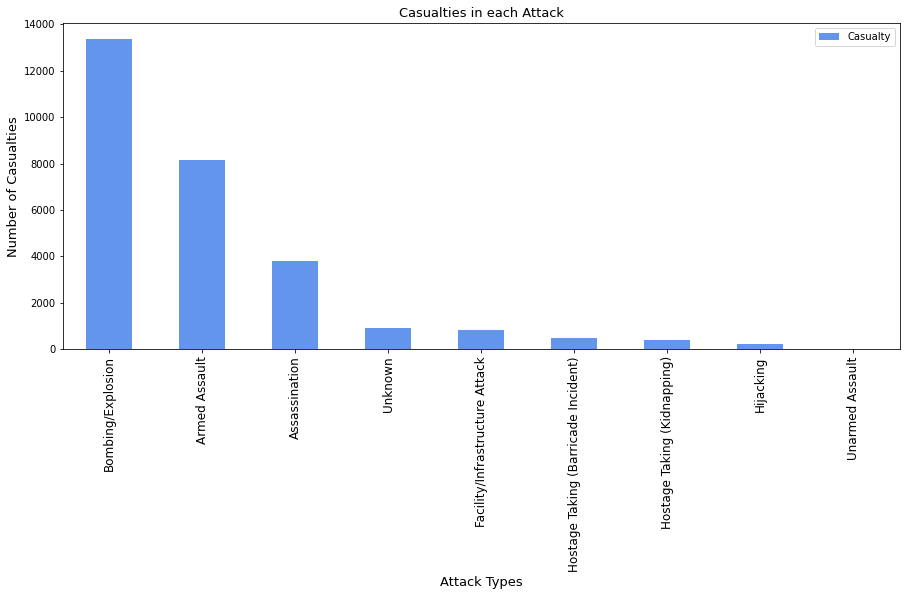

In [ ]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Killed by each Attack Type

In [ ]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Armed Assault,6144.0
Bombing/Explosion,3435.0
Assassination,3011.0
Unknown,770.0
Facility/Infrastructure Attack,552.0
Hostage Taking (Kidnapping),331.0
Hostage Taking (Barricade Incident),212.0
Hijacking,184.0
Unarmed Assault,17.0


1. Wounded by each Attack Type

In [ ]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,9940.0
Armed Assault,2015.0
Assassination,802.0
Facility/Infrastructure Attack,287.0
Hostage Taking (Barricade Incident),267.0
Unknown,148.0
Hijacking,57.0
Hostage Taking (Kidnapping),53.0
Unarmed Assault,10.0


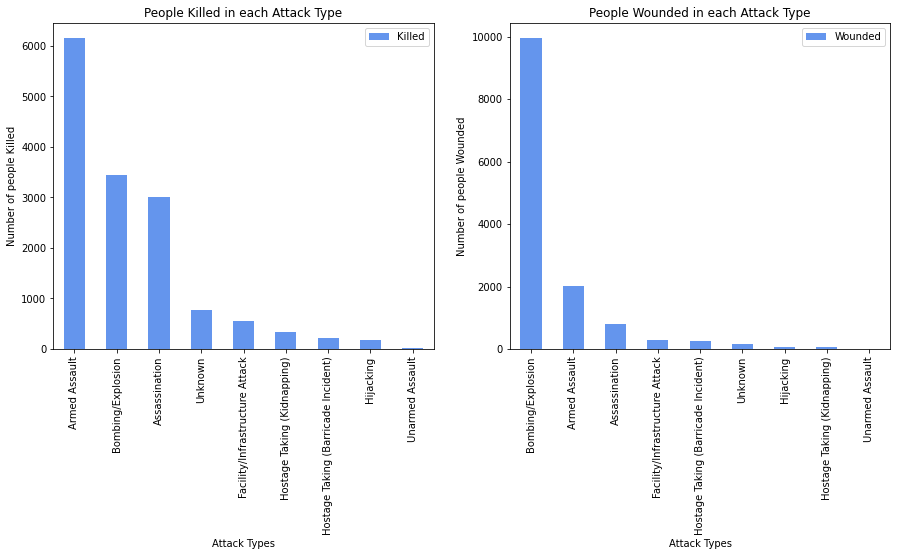

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

**7. Target Type wise Attacks**

1. Number of Attacks over each Target Type

In [ ]:
ta=df["Target Type"].value_counts()
ta

Business                          3309
Private Citizens & Property       2208
Government (General)              1891
Military                          1671
Police                            1448
Government (Diplomatic)            874
Journalists & Media                443
Transportation                     442
Educational Institution            426
Airports & Aircraft                399
Utilities                          312
Religious Figures/Institutions     181
Terrorists/Non-State Militia       177
Unknown                            153
Telecommunication                   99
Violent Political Party             80
Tourists                            52
NGO                                 48
Maritime                            31
Food or Water Supply                26
Abortion Related                    14
Other                                8
Name: Target Type, dtype: int64

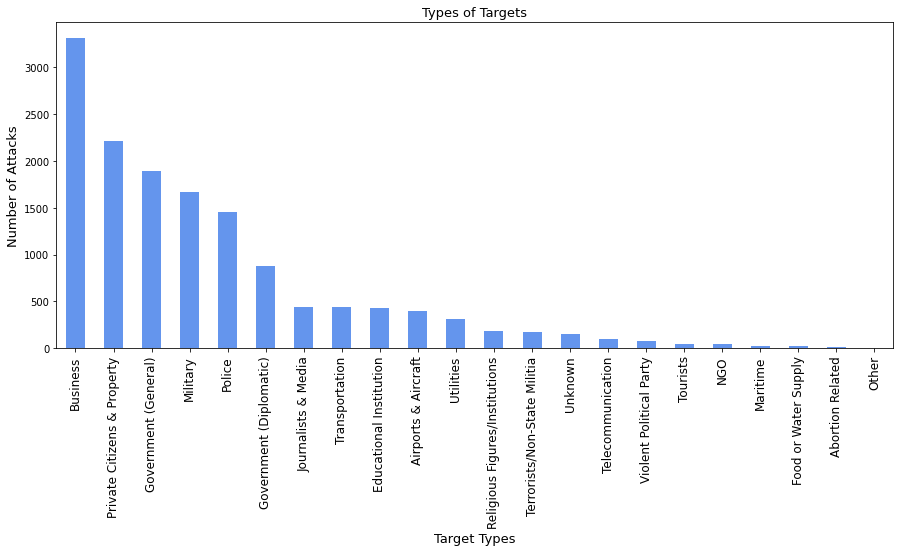

In [ ]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
tc

,Casualty
Target Type,
Military,5994.0
Private Citizens & Property,5013.0
Business,4739.0
Police,2721.0
Government (General),2330.0
Airports & Aircraft,1990.0
Transportation,1987.0
Educational Institution,592.0
Government (Diplomatic),559.0


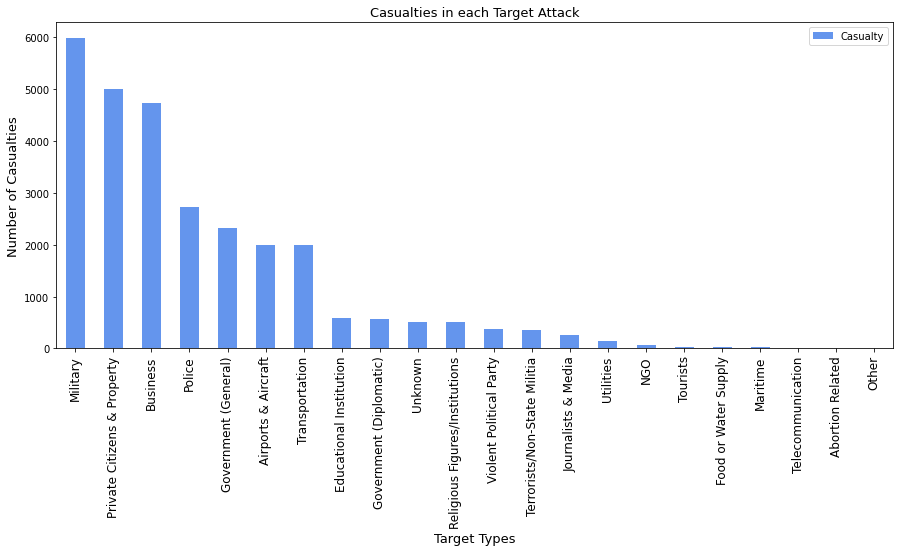

In [ ]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
tk

,Killed
Target Type,
Military,4719.0
Private Citizens & Property,2661.0
Business,1829.0
Police,1587.0
Government (General),938.0
Airports & Aircraft,873.0
Transportation,626.0
Terrorists/Non-State Militia,274.0
Unknown,230.0


In [ ]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw

,Wounded
Target Type,
Business,2910.0
Private Citizens & Property,2352.0
Government (General),1392.0
Transportation,1361.0
Military,1275.0
Police,1134.0
Airports & Aircraft,1117.0
Educational Institution,395.0
Government (Diplomatic),379.0


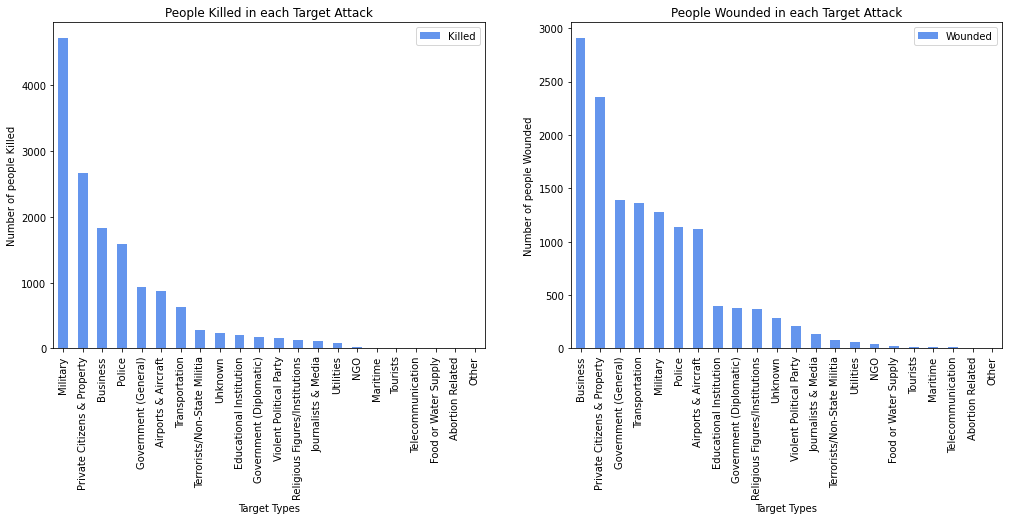

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

**8. Group + Country wise - Top10**

1. Sorting by number of Attacks

In [ ]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Group Name                                        Country       
Irish Republican Army (IRA)                       United Kingdom    1130
Basque Fatherland and Freedom (ETA)               Spain              603
Farabundo Marti National Liberation Front (FMLN)  El Salvador        269
Protestant extremists                             United Kingdom     204
Red Brigades                                      Italy              198
Sandinista National Liberation Front (FSLN)       Nicaragua          193
Revolutionary Armed Forces of Colombia (FARC)     Colombia           175
Palestinians                                      Israel             175
Ulster Volunteer Force (UVF)                      United Kingdom     170
Corsican National Liberation Front (FLNC)         France             169
dtype: int64

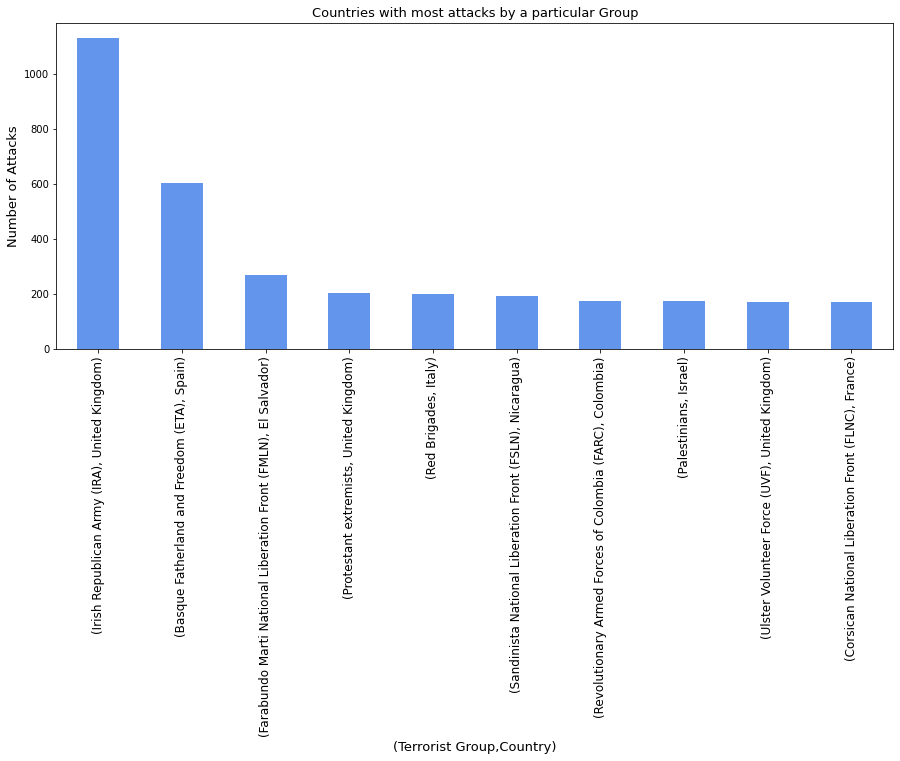

In [ ]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

1. Sorting by Number of Casualties

In [ ]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

,,Casualty
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,2341.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,1257.0
Basque Fatherland and Freedom (ETA),Spain,902.0
Moro National Liberation Front (MNLF),Philippines,787.0
Palestinians,Israel,513.0
Mujahedin-e Khalq (MEK),Iran,475.0
Revolutionary Armed Forces of Colombia (FARC),Colombia,424.0
Sandinista National Liberation Front (FSLN),Nicaragua,363.0
Montoneros (Argentina),Argentina,345.0


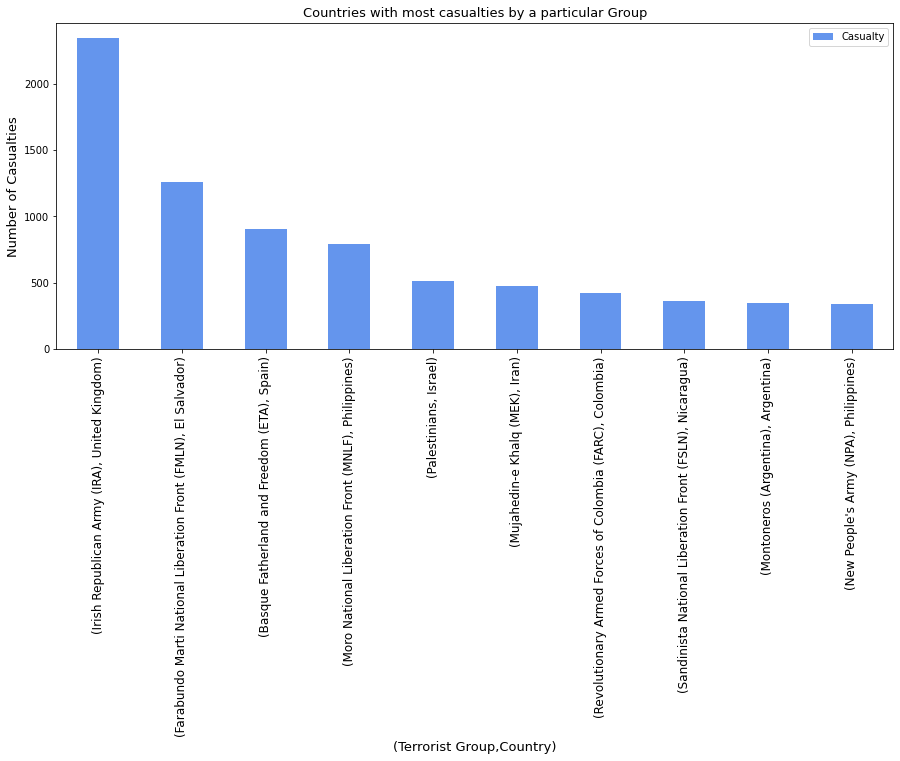

In [ ]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

1. Sorting by Number of People Killed

In [ ]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Killed
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1074.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,1015.0
Mujahedin-e Khalq (MEK),Iran,458.0
Revolutionary Armed Forces of Colombia (FARC),Colombia,353.0
Basque Fatherland and Freedom (ETA),Spain,317.0
Moro National Liberation Front (MNLF),Philippines,312.0
Guerrilla Army of the Poor (EGP),Guatemala,281.0
Ulster Volunteer Force (UVF),United Kingdom,249.0
Sandinista National Liberation Front (FSLN),Nicaragua,238.0


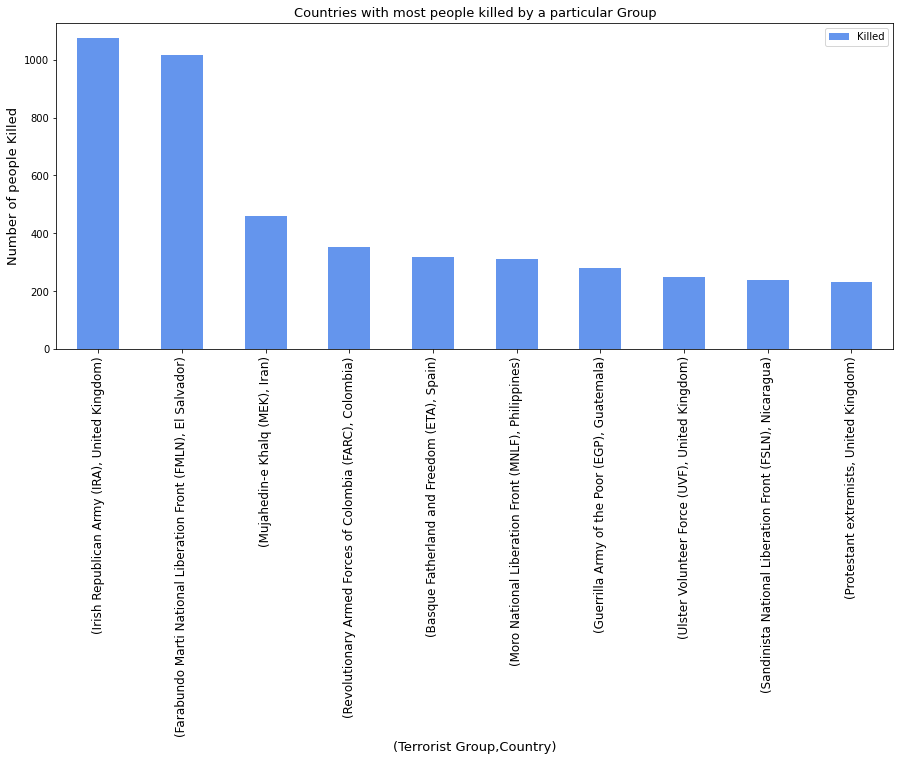

In [ ]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

1. Sorting by Number of People Wounded

In [ ]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Wounded
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1267.0
Basque Fatherland and Freedom (ETA),Spain,585.0
Moro National Liberation Front (MNLF),Philippines,475.0
Palestinians,Israel,462.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,242.0
Armed Revolutionary Nuclei (NAR),Italy,242.0
Neo-Nazi extremists,West Germany (FRG),215.0
New People's Army (NPA),Philippines,202.0
Ahmad Jibril,Lebanon,160.0


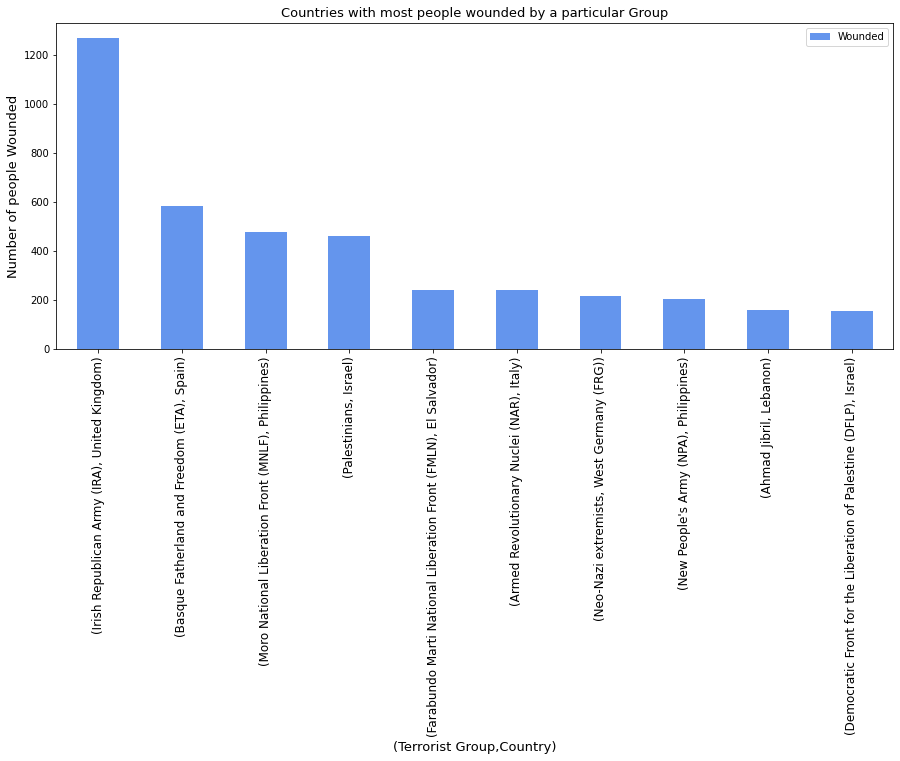

In [ ]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

**9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017**

1. Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [ ]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 28235.0


1. Killed due to Terrorist Attacks

In [ ]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 14656.0


1. Wounded due to Terrorist Attacks

In [ ]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 13579.0


**Model Created Successfully !!**


**THANK YOU ...**